In [1]:
import numpy as np
import torch
from gmm import GaussianMixture
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sample(mu, var, nb_samples=500):
    out = []
    for i in range(nb_samples):
        out += [
            torch.normal(mu, var.sqrt())
        ]
    return torch.stack(out, dim=0)

def plot_2d_sample(sample,color='blue'):
    x = sample[:, 0]
    y = sample[:, 1]
    plt.scatter(x, y, c=color)

(1500, 2)


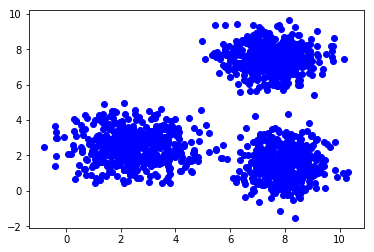

In [3]:
p1 = sample(torch.tensor([2.5, 2.5],dtype=torch.float32),torch.tensor([1.2,0.8],dtype=torch.float32)).numpy()
p2 = sample(torch.tensor([7.5,7.5],dtype=torch.float32),torch.tensor([0.75,0.5],dtype=torch.float32)).numpy()
p3 = sample(torch.tensor([8,1.5],dtype=torch.float32),torch.tensor([0.6,0.8],dtype=torch.float32)).numpy()
data = np.concatenate([p1,p2,p3], axis=0)
data_copy = np.copy(data)
print(data.shape)
np.random.shuffle(data)
plot_2d_sample(data)

In [4]:
gmm = GaussianMixture(3,2)

In [5]:
gmm.fit(data,iprint=True)

epoch = 1, log_likelihood = -4.803955554962158
epoch = 2, log_likelihood = -4.720869541168213
epoch = 3, log_likelihood = -4.565467357635498
epoch = 4, log_likelihood = -4.385863780975342
epoch = 5, log_likelihood = -4.2737579345703125
epoch = 6, log_likelihood = -4.212352752685547
epoch = 7, log_likelihood = -4.098977565765381
epoch = 8, log_likelihood = -3.9236371517181396
epoch = 9, log_likelihood = -3.7899374961853027
epoch = 10, log_likelihood = -3.6834020614624023
epoch = 11, log_likelihood = -3.6690657138824463
epoch = 12, log_likelihood = -3.668513774871826
epoch = 13, log_likelihood = -3.668492078781128
epoch = 14, log_likelihood = -3.6684911251068115


In [6]:
gmm.mu

Parameter containing:
tensor([[2.5284, 2.4952],
        [7.4680, 7.4816],
        [7.9745, 1.4979]])

In [7]:
gmm.var

Parameter containing:
tensor([[1.3261, 0.8328],
        [0.7411, 0.5576],
        [0.5573, 0.8016]])

In [8]:
ttt = gmm.predict(data,prob=False)

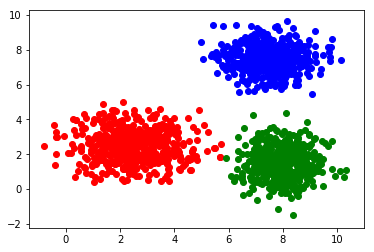

In [9]:
plot_2d_sample(data[ttt==0],color='red')
plot_2d_sample(data[ttt==1],color='blue')
plot_2d_sample(data[ttt==2],color='green')

In [10]:
p1_ex = sample(torch.tensor([2.5],dtype=torch.float32),torch.tensor([1.2],dtype=torch.float32)).numpy()
p2_ex = sample(torch.tensor([7.5],dtype=torch.float32),torch.tensor([0.75],dtype=torch.float32)).numpy()
p3_ex = sample(torch.tensor([8],dtype=torch.float32),torch.tensor([0.6],dtype=torch.float32)).numpy()
data_ex = np.concatenate([p1_ex,p2_ex,p3_ex], axis=0)
new_data = np.append(data_copy,data_ex,axis=1)
print(new_data.shape)

(1500, 3)


In [11]:
gmm.append_fit(new_data,1)

torch.Size([3, 3]) torch.Size([3, 3])
epoch = 1, log_likelihood = -4.978977680206299
epoch = 2, log_likelihood = -4.97663688659668
epoch = 3, log_likelihood = -4.976635932922363


In [12]:
gmm.mu

Parameter containing:
tensor([[2.5129, 2.4970, 2.5357],
        [7.4680, 7.4815, 7.4976],
        [7.9649, 1.5007, 7.9746]])

In [13]:
gmm.var

Parameter containing:
tensor([[1.2794, 0.8346, 1.2012],
        [0.7411, 0.5581, 0.6929],
        [0.5751, 0.8008, 0.6094]])